# Data augmentation with SMOTE ENN

In [ ]:
import pandas as pd

df = pd.read_csv("32features_1hour_shift_222222222.csv")


In [ ]:
print("Nombre de valeurs manquantes par colonne :")
print(df.isna().sum())


Nombre de valeurs manquantes par colonne :
cow                0
start_time         0
end_time           0
duration_hours     0
Minimum            0
Maximum            0
Mean               0
RMS                0
STD                0
MeanSTD6h         60
STDMean6h         60
STDSD              0
RMSSD              0
Mode               0
Q10                0
Q90                0
Q25                0
Q50                0
Q75                0
Skewness           0
Kurtosis           0
Autocorr1          0
Autocorr2          0
Autocorr3          0
Autocorr4          0
Autocorr5          0
Autocorr6          0
Autocorr7          0
Autocorr8          0
Autocorr9          0
Autocorr10         0
Autocorr11         0
h1                 0
h2                 0
h3                 0
h4                 0
oestrus            0
calving            0
lameness           0
mastitis           0
other_disease      0
OK                 0
dtype: int64


In [ ]:
print("Nombre de valeurs manquantes par colonne :")
print(df.isna().sum())

# Afficher nombre de lignes et de colonnes
print(f"✅ Nombre de lignes : {df.shape[0]}")
print(f"✅ Nombre de colonnes : {df.shape[1]}")


Nombre de valeurs manquantes par colonne :
cow                0
start_time         0
end_time           0
duration_hours     0
Minimum            0
Maximum            0
Mean               0
RMS                0
STD                0
MeanSTD6h         60
STDMean6h         60
STDSD              0
RMSSD              0
Mode               0
Q10                0
Q90                0
Q25                0
Q50                0
Q75                0
Skewness           0
Kurtosis           0
Autocorr1          0
Autocorr2          0
Autocorr3          0
Autocorr4          0
Autocorr5          0
Autocorr6          0
Autocorr7          0
Autocorr8          0
Autocorr9          0
Autocorr10         0
Autocorr11         0
h1                 0
h2                 0
h3                 0
h4                 0
oestrus            0
calving            0
lameness           0
mastitis           0
other_disease      0
OK                 0
dtype: int64
✅ Nombre de lignes : 36971
✅ Nombre de colonnes : 42


There are missing values. SMOTE cannot work in the presence of such values, so we have two options: either we drop them or we impute them, for example, using the mean value.


code with imputing

In [ ]:
# import pandas as pd
# from imblearn.combine import SMOTEENN
# from sklearn.impute import SimpleImputer
# from collections import Counter

# # Liste des colonnes cibles à traiter
# target_columns = ['OK', 'oestrus', 'lameness', 'mastitis', 'other_disease']

# # Sélection des features numériques
# X_full = df.drop(columns=target_columns)
# X_full = X_full.select_dtypes(include=['int64', 'float64'])

# # Imputation des NaNs
# imputer = SimpleImputer(strategy='mean')
# X_full_imputed = pd.DataFrame(imputer.fit_transform(X_full), columns=X_full.columns)

# # Initialiser une liste pour stocker tous les échantillons équilibrés
# all_balanced_samples = []

# for target in target_columns:
#     print(f"\nTraitement de la cible : {target}")
#     y = df[target]
#     y = y.loc[X_full_imputed.index]

#     print("Avant SMOTE-ENN :", Counter(y))

#     smote_enn = SMOTEENN(random_state=42)
#     X_res, y_res = smote_enn.fit_resample(X_full_imputed, y)

#     print("Après SMOTE-ENN :", Counter(y_res))

#     # Construire le DataFrame avec une colonne indiquant la cible traitée
#     X_res_df = pd.DataFrame(X_res, columns=X_full.columns)
#     y_res_df = pd.Series(y_res, name=target)

#     # Ajouter la cible en colonne + les autres cibles à 0
#     other_targets = {col: 0 for col in target_columns if col != target}
#     for col, val in other_targets.items():
#         X_res_df[col] = val

#     # Ajouter la cible actuelle
#     X_res_df[target] = y_res_df

#     # Ajouter à la liste globale
#     all_balanced_samples.append(X_res_df)

# # Concaténer tous les échantillons équilibrés
# final_df = pd.concat(all_balanced_samples, ignore_index=True)

# # Sauvegarder dans un seul fichier CSV
# final_df.to_csv("balanced_dataset_all.csv", index=False)
# print(" Tous les échantillons synthétiques sauvegardés dans 'balanced_dataset_all.csv'")


code with dropping

In [ ]:
import pandas as pd
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter

# Fusionner les colonnes cibles en une seule variable multiclasse
def get_label(row):
    for col in target_columns:
        if row[col] == 1:
            return col
    return 'unknown'

target_columns = ['OK', 'oestrus', 'lameness', 'mastitis', 'other_disease']
df_cleaned = df.dropna(subset=target_columns).copy()

# Extraire X et y
X_full = df_cleaned.drop(columns=target_columns)
X_full = X_full.select_dtypes(include=['int64', 'float64'])
df_cleaned = df_cleaned[X_full.columns.tolist() + target_columns]
df_cleaned = df_cleaned.dropna()

df_cleaned['label'] = df_cleaned[target_columns].idxmax(axis=1)

X = df_cleaned.drop(columns=target_columns + ['label'])
y = df_cleaned['label']

print("Avant SMOTE-ENN :", Counter(y))

# Appliquer SMOTE-ENN sur la vraie variable multiclasse
smote_enn = SMOTEENN(
    sampling_strategy='minority',  # essayez 'minority' au lieu de 'auto'
    random_state=42,
    smote=SMOTE(k_neighbors=2),
    enn=EditedNearestNeighbours(n_neighbors=3),
    n_jobs=1
)


X_res, y_res = smote_enn.fit_resample(X, y)

print("Après SMOTE-ENN :", Counter(y_res))

# Reconvertir en one-hot encoding si nécessaire
final_df = pd.DataFrame(X_res, columns=X.columns)
for col in target_columns:
    final_df[col] = (y_res == col).astype(int)

# Sauvegarder
final_df.to_csv("balanced_dataset_multiclass.csv", index=False)
print("✅ Dataset multiclasse équilibré sauvegardé dans 'balanced_dataset_multiclass.csv'")


Avant SMOTE-ENN : Counter({'lameness': 26536, 'OK': 8558, 'oestrus': 1803, 'mastitis': 14})
Après SMOTE-ENN : Counter({'OK': 26536, 'mastitis': 26536, 'oestrus': 26211, 'lameness': 21195})
✅ Dataset multiclasse équilibré sauvegardé dans 'balanced_dataset_multiclass.csv'


In [ ]:
print("\nDistribution des 0 et 1 par classe AVANT SMOTE-ENN :")
for col in target_columns:
    counts = df_cleaned[col].value_counts().to_dict()
    print(f"{col}: {counts}")



Distribution des 0 et 1 par classe AVANT SMOTE-ENN :
OK: {0: 28353, 1: 8558}
oestrus: {0: 35108, 1: 1803}
lameness: {1: 26536, 0: 10375}
mastitis: {0: 36897, 1: 14}
other_disease: {0: 36911}


In [ ]:
print("\nDistribution des 0 et 1 par classe APRÈS SMOTE-ENN :")
for col in target_columns:
    counts = final_df[col].value_counts().to_dict()
    print(f"{col}: {counts}")



Distribution des 0 et 1 par classe APRÈS SMOTE-ENN :
OK: {0: 73942, 1: 26536}
oestrus: {0: 74267, 1: 26211}
lameness: {0: 79283, 1: 21195}
mastitis: {0: 73942, 1: 26536}
other_disease: {0: 100478}


In [ ]:
# Afficher les lignes où toutes les cibles sont égales à 0
all_zero_targets = final_df[(final_df[target_columns] == 0).all(axis=1)]
print("🔍 Lignes où toutes les cibles sont à 0 :")
print(all_zero_targets)
print(f"Nombre de lignes concernées : {len(all_zero_targets)}")


🔍 Lignes où toutes les cibles sont à 0 :
Empty DataFrame
Columns: [cow, duration_hours, Minimum, Maximum, Mean, RMS, STD, MeanSTD6h, STDMean6h, STDSD, RMSSD, Mode, Q10, Q90, Q25, Q50, Q75, Skewness, Kurtosis, Autocorr1, Autocorr2, Autocorr3, Autocorr4, Autocorr5, Autocorr6, Autocorr7, Autocorr8, Autocorr9, Autocorr10, Autocorr11, h1, h2, h3, h4, calving, OK, oestrus, lameness, mastitis, other_disease]
Index: []

[0 rows x 40 columns]
Nombre de lignes concernées : 0


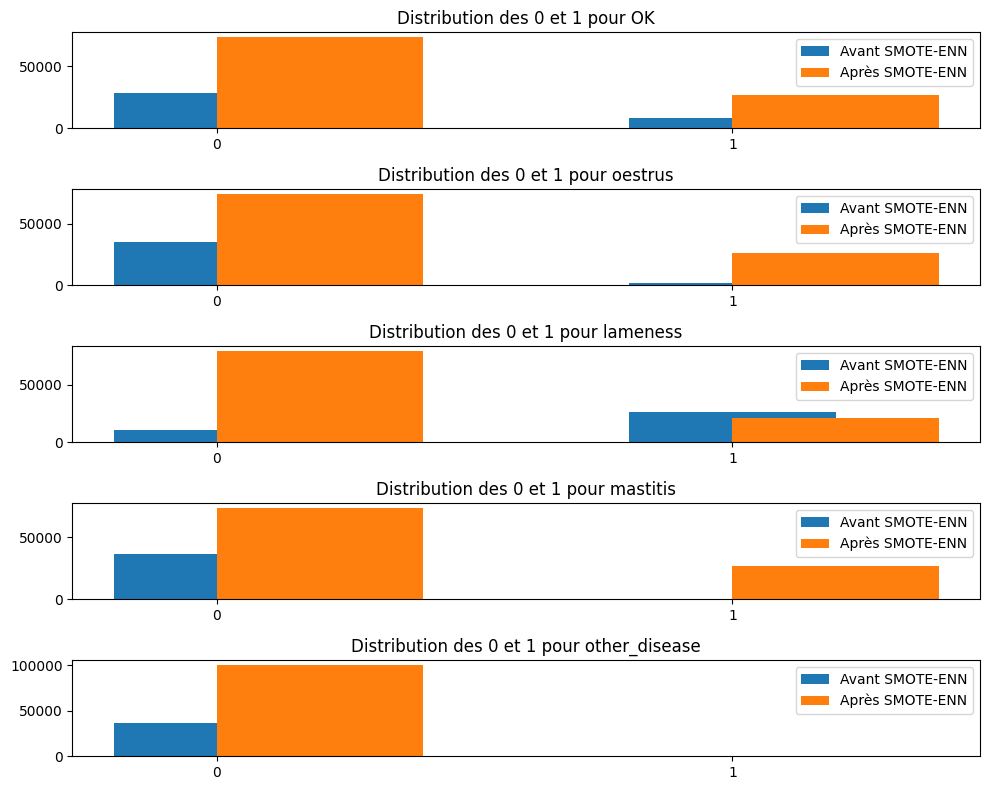

In [ ]:
import matplotlib.pyplot as plt

# Définir les colonnes cibles
target_columns = ['OK','oestrus', 'lameness', 'mastitis', 'other_disease']

# Calcul des distributions des 0 et 1 avant SMOTE-ENN
before_counts = {col: df_cleaned[col].value_counts().to_dict() for col in target_columns}

# Calcul des distributions des 0 et 1 après SMOTE-ENN
after_counts = {col: final_df[col].value_counts().to_dict() for col in target_columns}

# Affichage des distributions sous forme d'histogrammes
fig, axes = plt.subplots(len(target_columns), 1, figsize=(10, 8))

for i, col in enumerate(target_columns):
    # Récupérer les comptes avant et après
    before_vals = before_counts[col]
    after_vals = after_counts[col]

    # Tracer les histogrammes
    axes[i].bar([0, 1], [before_vals.get(0, 0), before_vals.get(1, 0)], width=0.4, label="Avant SMOTE-ENN", align='center')
    axes[i].bar([0, 1], [after_vals.get(0, 0), after_vals.get(1, 0)], width=0.4, label="Après SMOTE-ENN", align='edge')

    # Définir les propriétés du graphique
    axes[i].set_title(f'Distribution des 0 et 1 pour {col}')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0', '1'])
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Afficher la forme du dataset avant SMOTE-ENN
print("✅ AVANT SMOTE-ENN :")
print("Nombre de lignes :", df_cleaned.shape[0])
print("Nombre de colonnes :", df_cleaned.shape[1])

# Afficher la forme du dataset après SMOTE-ENN
print("\n✅ APRÈS SMOTE-ENN :")
print("Nombre de lignes :", final_df.shape[0])
print("Nombre de colonnes :", final_df.shape[1])


✅ AVANT SMOTE-ENN :
Nombre de lignes : 36911
Nombre de colonnes : 41

✅ APRÈS SMOTE-ENN :
Nombre de lignes : 100478
Nombre de colonnes : 40


# Data classification

# Features Selection with SV

## Étape 1 : Entraîner un modèle XGBoost avec toutes les features

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

final_df = pd.read_csv('balanced_dataset_all.csv')
feature_cols = [
    'Minimum', 'Maximum', 'Mean', 'RMS', 'STD', 'MeanSTD6h', 'STDMean6h', 'STDSD',
    'RMSSD', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75',
    'Skewness', 'Kurtosis'
] + [f'Autocorr{i}' for i in range(1, 12)] + [f'h{i}' for i in range(1, 5)]

In [ ]:

# Features et labels
X = final_df[feature_cols]
label = ['oestrus', 'lameness', 'mastitis', 'other_disease','OK']
y = final_df[label]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle multilabel via MultiOutputClassifier
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)


c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:16:02] WARNING: C:\actio

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))

## Étape 2 : Calculer les SHAP values

c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Traitement de la condition: oestrus
Traitement de la condition: lameness
Traitement de la condition: mastitis
Traitement de la condition: other_disease
Traitement de la condition: OK


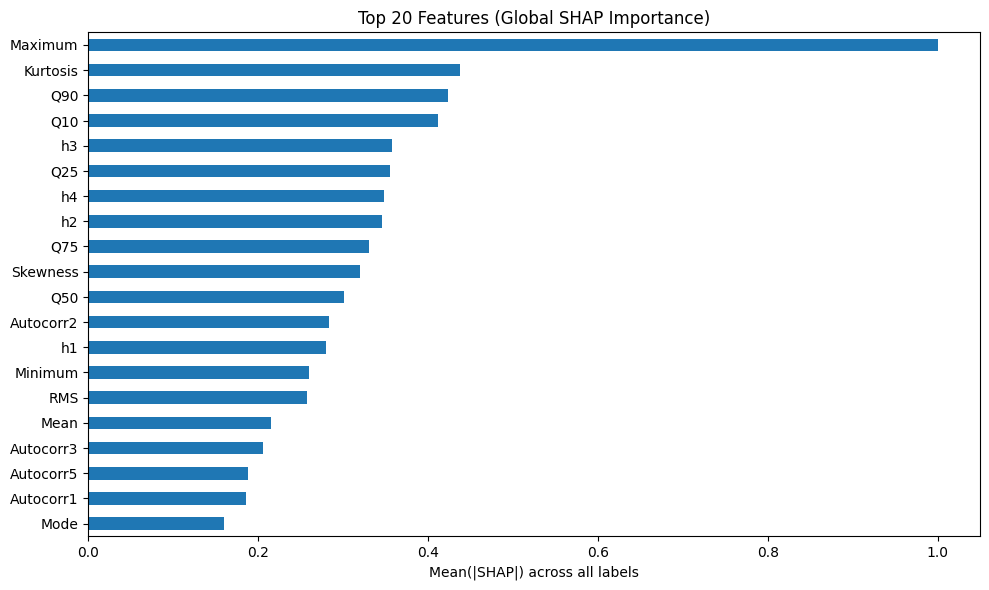

,oestrus,lameness,mastitis,other_disease,OK,mean_global
Maximum,1.747902,0.753579,1.626658,0.624655,0.247337,1.000026
Kurtosis,0.231991,0.786249,0.516417,0.426803,0.229947,0.438281
Q90,0.787652,0.229843,0.324015,0.622113,0.154299,0.423585
Q10,0.352093,0.209084,0.947911,0.430568,0.119385,0.411808
h3,0.240624,0.242580,0.691214,0.543728,0.072031,0.358035
Q25,0.232720,0.282004,0.860887,0.282625,0.120153,0.355678
h4,0.263591,0.289264,0.821388,0.266530,0.102279,0.348610
h2,0.367493,0.273233,0.743954,0.272283,0.071780,0.345749
Q75,0.477705,0.248461,0.407500,0.284632,0.236990,0.331058
Skewness,0.517847,0.321537,0.507885,0.181175,0.072833,0.320255


In [ ]:
import shap
import numpy as np

# Stockage des SHAP moyens pour chaque feature par label
shap_matrix = pd.DataFrame(index=X_test.columns)

# Boucle sur chaque label
for i, target in enumerate(label):
    print(f"Traitement de la condition: {target}")

    single_model = multi_model.estimators_[i]
    explainer = shap.Explainer(single_model)
    shap_values = explainer(X_test)

    mean_shap = np.abs(shap_values.values).mean(axis=0)

    # Ajouter les valeurs dans la matrice
    shap_matrix[target] = mean_shap

# Moyenne globale des SHAP values par feature
shap_matrix['mean_global'] = shap_matrix.mean(axis=1)

# Tri des features par importance globale
shap_ranked = shap_matrix.sort_values('mean_global', ascending=False)

# Affichage du top 20
top_features = shap_ranked.head(20)

# Visualisation
plt.figure(figsize=(10, 6))
top_features['mean_global'].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Features (Global SHAP Importance)")
plt.xlabel("Mean(|SHAP|) across all labels")
plt.tight_layout()
plt.show()

display(top_features)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier

import numpy as np
import pandas as pd

# Train-test split (refait pour clarté)
X = final_df[feature_cols]
y = final_df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 1: Entraîner le modèle initial pour obtenir les SHAP values
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)

# Calcul des SHAP moyens globaux
shap_matrix = pd.DataFrame(index=X_test.columns)

for i, target in enumerate(label):
    explainer = shap.Explainer(multi_model.estimators_[i])
    shap_values = explainer(X_test)
    mean_shap = np.abs(shap_values.values).mean(axis=0)
    shap_matrix[target] = mean_shap

shap_matrix['mean_global'] = shap_matrix.mean(axis=1)

# Étape 2: Essai de plusieurs seuils pour la sélection de features
thresholds = np.arange(0.05, 0.3, 0.02)
results = []

for threshold in thresholds:
    selected_features = shap_matrix[shap_matrix['mean_global'] >= threshold].index.tolist()

    if not selected_features:
        print(f"🔴 Seuil {threshold}: aucune feature sélectionnée.")
        continue

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_sel = MultiOutputClassifier(xgb.XGBClassifier(eval_metric='logloss'))
    model_sel.fit(X_train_sel, y_train)

    y_pred = model_sel.predict(X_test_sel)

    # Évaluation multilabel
    f1 = np.mean([f1_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0, average='macro') for i in range(y.shape[1])])
    precision = np.mean([precision_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0) for i in range(y.shape[1])])
    recall = np.mean([recall_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0) for i in range(y.shape[1])])

    # Gestion AUC (nécessite predict_proba et au moins deux classes présentes)
    try:
        y_prob = np.column_stack([model_sel.estimators_[i].predict_proba(X_test_sel)[:, 1] for i in range(y.shape[1])])
        auc = np.mean([roc_auc_score(y_test.iloc[:, i], y_prob[:, i]) for i in range(y.shape[1])])
    except Exception as e:
        auc = np.nan

    print(f"✅ Seuil {threshold:.3f} | {len(selected_features)} features | F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | AUC: {auc:.4f}")

    results.append({
        'threshold': threshold,
        'num_features': len(selected_features),
        'f1_macro': f1,
        'precision_macro': precision,
        'recall_macro': recall,
        'roc_auc_macro': auc
    })

# Résumé
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='f1_macro', ascending=False))

c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:31] WARNING: C:\actio

✅ Seuil 0.050 | 32 features | F1: 0.8293 | Precision: 0.6353 | Recall: 0.7383 | AUC: 0.9317
✅ Seuil 0.070 | 32 features | F1: 0.8293 | Precision: 0.6353 | Recall: 0.7383 | AUC: 0.9317
✅ Seuil 0.090 | 31 features | F1: 0.8297 | Precision: 0.6352 | Recall: 0.7403 | AUC: 0.9317
✅ Seuil 0.110 | 29 features | F1: 0.8305 | Precision: 0.6355 | Recall: 0.7433 | AUC: 0.9316
✅ Seuil 0.130 | 28 features | F1: 0.8302 | Precision: 0.6354 | Recall: 0.7423 | AUC: 0.9318
✅ Seuil 0.150 | 21 features | F1: 0.8301 | Precision: 0.6337 | Recall: 0.7443 | AUC: 0.9327
✅ Seuil 0.170 | 19 features | F1: 0.8300 | Precision: 0.6336 | Recall: 0.7441 | AUC: 0.9328
✅ Seuil 0.190 | 17 features | F1: 0.8302 | Precision: 0.6334 | Recall: 0.7457 | AUC: 0.9336
✅ Seuil 0.210 | 16 features | F1: 0.8296 | Precision: 0.6324 | Recall: 0.7442 | AUC: 0.9340
✅ Seuil 0.230 | 15 features | F1: 0.8302 | Precision: 0.6329 | Recall: 0.7465 | AUC: 0.9337
✅ Seuil 0.250 | 15 features | F1: 0.8302 | Precision: 0.6329 | Recall: 0.7465 | 

,threshold,num_features,f1_macro,precision_macro,recall_macro,roc_auc_macro
3,0.11,29,0.830474,0.635530,0.743301,0.931635
7,0.19,17,0.830246,0.633415,0.745685,0.933566
4,0.13,28,0.830226,0.635358,0.742350,0.931840
9,0.23,15,0.830213,0.632900,0.746489,0.933687
10,0.25,15,0.830213,0.632900,0.746489,0.933687
5,0.15,21,0.830060,0.633736,0.744260,0.932699
6,0.17,19,0.829985,0.633649,0.744135,0.932827
2,0.09,31,0.829707,0.635241,0.740275,0.931736
8,0.21,16,0.829586,0.632439,0.744226,0.933973
1,0.07,32,0.829295,0.635278,0.738296,0.931727


### Optimal :Seuil 0.15 | 23 features | F1: 0.950244 | Precision: 0.963512 | Recall: 0.849105 | AUC: 0.998962

In [ ]:
threshold = 0.15
selected_features = shap_matrix[shap_matrix['mean_global'] >= threshold].index.tolist()

print(f"🎯 Seuil choisi = {threshold}")
print(f"✅ {len(selected_features)} features sélectionnées :\n{selected_features}")

🎯 Seuil choisi = 0.15
✅ 21 features sélectionnées :
['Minimum', 'Maximum', 'Mean', 'RMS', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2', 'Autocorr3', 'Autocorr5', 'Autocorr11', 'h1', 'h2', 'h3', 'h4']


In [ ]:
print(final_df.columns)

Index(['cow', 'duration_hours', 'Minimum', 'Maximum', 'Mean', 'RMS', 'STD',
       'MeanSTD6h', 'STDMean6h', 'STDSD', 'RMSSD', 'Mode', 'Q10', 'Q90', 'Q25',
       'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2',
       'Autocorr3', 'Autocorr4', 'Autocorr5', 'Autocorr6', 'Autocorr7',
       'Autocorr8', 'Autocorr9', 'Autocorr10', 'Autocorr11', 'h1', 'h2', 'h3',
       'h4', 'calving', 'oestrus', 'lameness', 'mastitis', 'other_disease',
       'OK'],
      dtype='object')


In [ ]:
selected_features=['Minimum', 'Maximum', 'Mean', 'RMS', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2', 'Autocorr3', 'Autocorr5', 'Autocorr9', 'h1', 'h2', 'h3', 'h4']
import pandas as pd
if selected_features:
    # Update X_train and X_test with only the selected columns
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    # Optionally, save the updated dataset to a CSV file
    final_selected_df = final_df[selected_features]
    features_columns = ['cow','duration_hours']
    label_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'other_disease','OK']

    # Combine features and labels
    final_selected_df_1 = pd.concat([
        final_df[features_columns],
        final_selected_df,
        final_df[label_columns]
    ], axis=1)

    final_selected_df_1.to_csv('selected_features_after_augmentation.csv', index=False)
    print("Selected features dataset saved to 'selected_features_after_augmentations.csv'.")
    print(final_selected_df_1.head())
else:
        print("No features selected for the given threshold.")

Selected features dataset saved to 'selected_features_after_augmentations.csv'.
   cow  duration_hours    Minimum     Maximum       Mean         RMS  \
0  156              24 -827.99977  1510.84206 -54.151572  919.804455   
1  156              24 -827.99977  1510.84206 -53.558642  919.281855   
2  156              24 -827.99977  1510.84206 -51.643205  917.622441   
3  156              24 -827.99977  1510.84206 -51.905188  917.846456   
4  156              24 -827.99977  1510.84206 -49.251368  915.544739   

          Q10          Q90         Q25        Q50  ...           h1  \
0 -823.678687  1477.729225 -793.411938 -687.79984  ...  3456.714454   
1 -823.678687  1477.729225 -789.921730 -687.79984  ...  3447.014309   
2 -823.271527  1477.729225 -782.554630 -687.79984  ...  3425.753901   
3 -823.271527  1477.729225 -786.052345 -687.79984  ...  3427.088874   
4 -813.129421  1477.729225 -775.889140 -687.79984  ...  3430.668420   

            h2           h3           h4  oestrus  calving  

In [ ]:
print(final_selected_df_1.columns)

Index(['cow', 'duration_hours', 'Minimum', 'Maximum', 'Mean', 'RMS', 'Q10',
       'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1',
       'Autocorr2', 'Autocorr3', 'Autocorr5', 'Autocorr9', 'h1', 'h2', 'h3',
       'h4', 'oestrus', 'calving', 'lameness', 'mastitis', 'other_disease',
       'OK'],
      dtype='object')


# Data classification with RF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, recall_score, confusion_matrix
)

# Step 1: Load your dataset
df = pd.read_csv("selected_features_after_augmentation.csv")  # replace with your actual dataset path

# Step 2: Create the 'target' column based on binary columns
def get_target_label(row):
    for label in ['oestrus',  'lameness', 'mastitis', 'other_disease']:
        if row[label] == 1:
            return label
    return 'ok'

df['target'] = df.apply(get_target_label, axis=1)

# Split 10% for validation
df_remain, df_val = train_test_split(
    df, test_size=0.10, random_state=42, stratify=df['target']
)
df_val.to_csv("validation_10_percent(2).csv", index=False)
df_remain.to_csv("train_test_90_percent.csv", index=False)

# List of selected features
selected_features = ['Minimum', 'Maximum', 'Mean', 'RMS', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2', 'Autocorr3', 'Autocorr5', 'Autocorr9', 'h1', 'h2', 'h3', 'h4']

X_remain = df_remain[selected_features]
y_remain = df_remain['target']

# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_remain, y_remain, test_size=0.20, random_state=42, stratify=y_remain
)

# Use the best parameters found from previous GridSearch
best_clf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train and evaluate
best_clf.fit(X_train, y_train)
y_predict = best_clf.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_predict))

# Evaluation metrics
accuracy = accuracy_score(y_test, y_predict)
f1_macro = f1_score(y_test, y_predict, average='macro')
precision_macro = precision_score(y_test, y_predict, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_predict, average='macro', zero_division=0)

labels = best_clf.classes_
cm = confusion_matrix(y_test, y_predict, labels=labels)

# Calculate specificity per class
specificity_per_class = []
for i, label in enumerate(labels):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificity_per_class.append(specificity)

specificity_macro = np.mean(specificity_per_class)

# Print results
print(f"\n Evaluation Metrics:")
print(f"Accuracy           : {accuracy:.4f}")
print(f"F1 Score (Macro)   : {f1_macro:.4f}")
print(f"Precision (Macro)  : {precision_macro:.4f}")
print(f"Recall/Sensitivity : {recall_macro:.4f}")
print(f"Specificity (Macro): {specificity_macro:.4f}")



 Classification Report:
               precision    recall  f1-score   support

     lameness       0.69      0.68      0.69      6827
     mastitis       0.92      0.95      0.94      7094
      oestrus       0.88      0.92      0.90      7047
           ok       0.90      0.89      0.89     40653
other_disease       0.84      0.86      0.85      6996

     accuracy                           0.87     68617
    macro avg       0.85      0.86      0.85     68617
 weighted avg       0.87      0.87      0.87     68617


 Evaluation Metrics:
Accuracy           : 0.8719
F1 Score (Macro)   : 0.8519
Precision (Macro)  : 0.8462
Recall/Sensitivity : 0.8580
Specificity (Macro): 0.9554


In [ ]:
# import joblib

# # Sauvegarder le modèle
# joblib.dump(best_clf, 'random_forest_model.pkl')


['random_forest_model.pkl']

### Confusion matrix

In [ ]:
# labels = best_clf.classes_
# cm = confusion_matrix(y_test, y_predict, labels=labels)


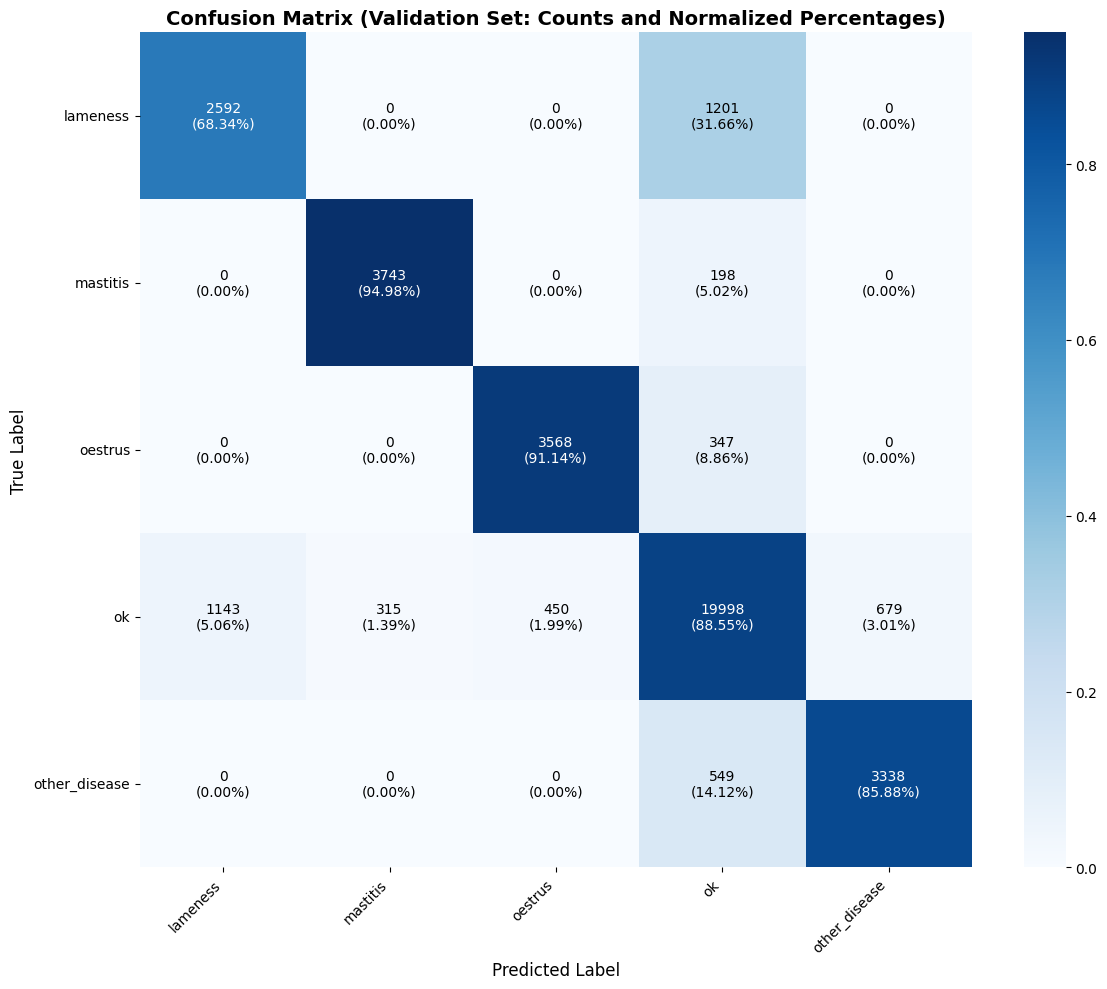

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix and normalization for validation data
cm_val = confusion_matrix(y_val, y_val_predict, labels=labels)
cm_val_normalized = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]

# Plot with counts and normalized percentages
plt.figure(figsize=(12, 10))
sns.heatmap(cm_val_normalized, annot=False, cmap='Blues', cbar=True)

for i in range(cm_val.shape[0]):
    for j in range(cm_val.shape[1]):
        count = cm_val[i, j]
        percent = cm_val_normalized[i, j] * 100
        plt.text(j + 0.5, i + 0.5, f"{count}\n({percent:.2f}%)",
                 ha='center', va='center',
                 fontsize=10,
                 color='white' if percent > 50 else 'black')

# Tick labels
plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

plt.title('Confusion Matrix (Validation Set: Counts and Normalized Percentages)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Sauvegarder le modèle
joblib.dump(best_clf, 'random_forest_model.pkl')


['random_forest_model.pkl']

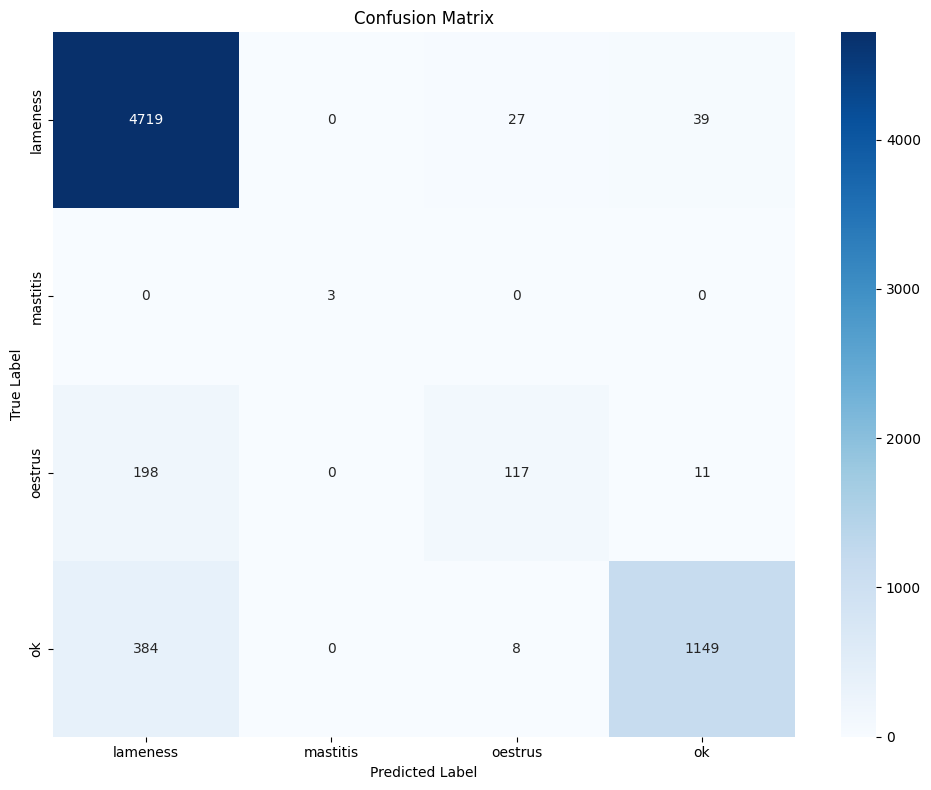

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=labels, yticklabels=labels)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.tight_layout()
# plt.show()


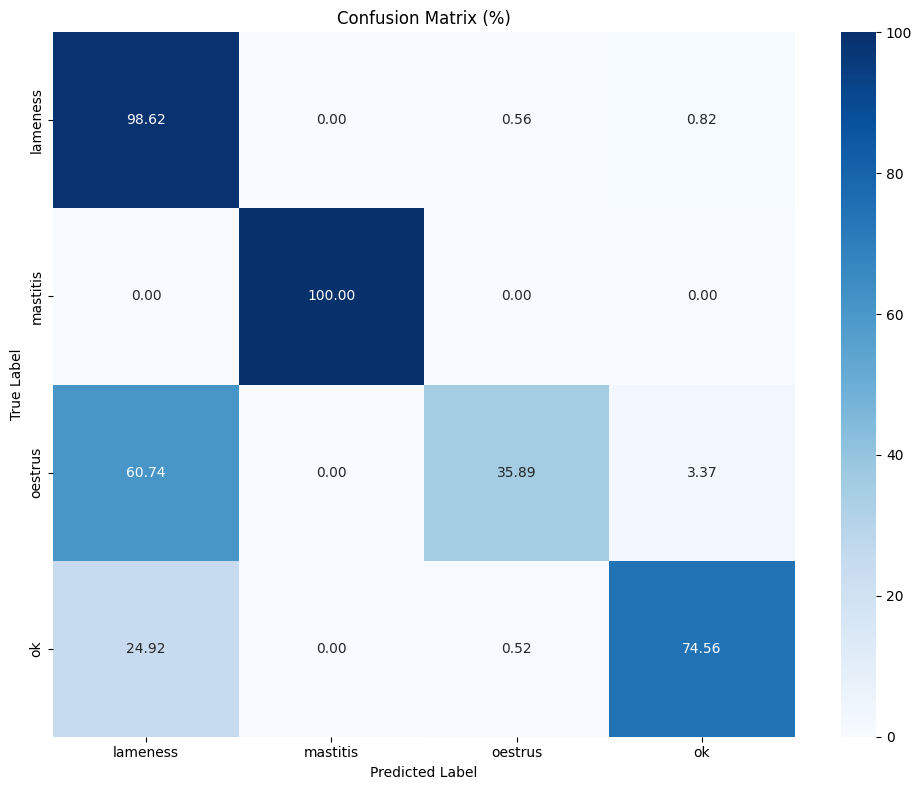

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Normalize the confusion matrix row-wise (per true label)
# cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
#             xticklabels=labels, yticklabels=labels)

# plt.title('Confusion Matrix (%)')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.tight_layout()
# plt.show()


## Tester sur les données de validation

In [ ]:
import joblib

# Sauvegarder le modèle
joblib.dump(best_clf, 'random_forest_model.pkl')


['random_forest_model.pkl']

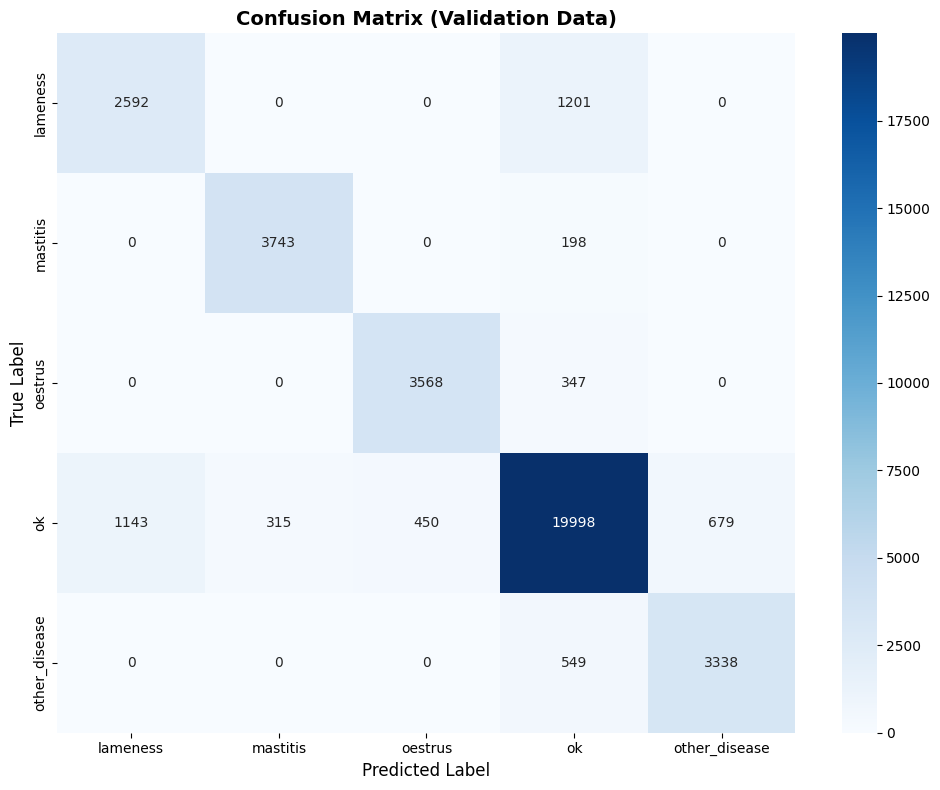

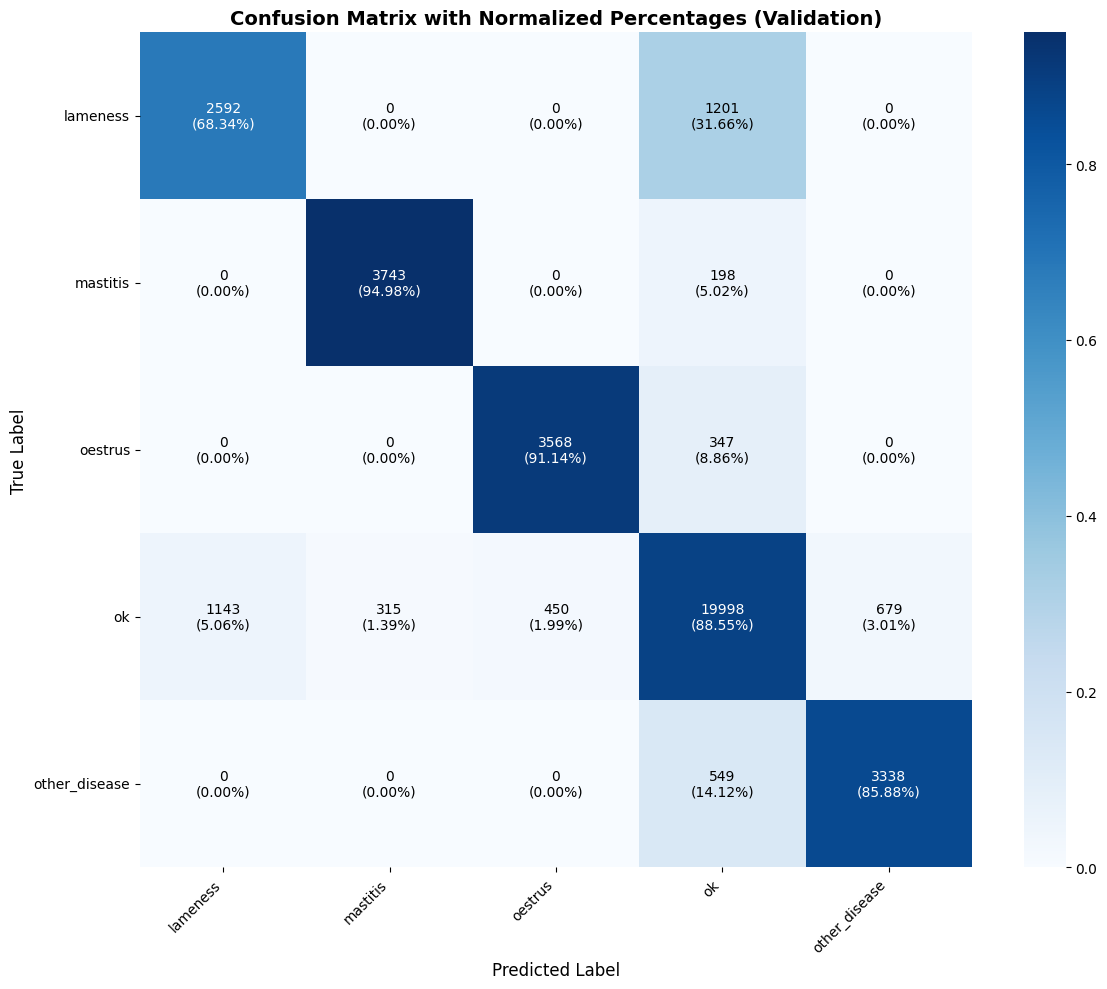

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load validation data
df_val = pd.read_csv("validation_10_percent(2).csv")
X_val = df_val[selected_features]
y_val = df_val['target']

# Predict on validation set
y_val_predict = best_clf.predict(X_val)

# Confusion matrix (absolute values)
cm_val = confusion_matrix(y_val, y_val_predict, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Validation Data)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Normalized confusion matrix (validation set)
cm_val_normalized = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(cm_val_normalized, annot=False, cmap='Blues', cbar=True)

for i in range(cm_val.shape[0]):
    for j in range(cm_val.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{cm_val[i, j]}\n({cm_val_normalized[i, j] * 100:.2f}%)",
                 ha='center', va='center',
                 fontsize=10,
                 color='white' if cm_val_normalized[i, j] > 0.5 else 'black')

plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)
plt.title('Confusion Matrix with Normalized Percentages (Validation)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Rapport détaillé par classe
report = classification_report(y_val, y_val_predict, target_names=labels)
print("===== Classification Report (détail par classe) =====")
print(report)

# Sauvegarder dans un fichier texte
with open("classification_report.txt", "w") as f:
    f.write(report)

# Scores globaux
precision_macro = precision_score(y_val, y_val_predict, average='macro')
recall_macro = recall_score(y_val, y_val_predict, average='macro')
f1_macro = f1_score(y_val, y_val_predict, average='macro')

precision_weighted = precision_score(y_val, y_val_predict, average='weighted')
recall_weighted = recall_score(y_val, y_val_predict, average='weighted')
f1_weighted = f1_score(y_val, y_val_predict, average='weighted')

# Affichage des scores globaux
print("===== Scores Globaux =====")
print(f"Macro Precision : {precision_macro:.4f}")
print(f"Macro Recall    : {recall_macro:.4f}")
print(f"Macro F1-Score  : {f1_macro:.4f}\n")

print(f"Weighted Precision : {precision_weighted:.4f}")
print(f"Weighted Recall    : {recall_weighted:.4f}")
print(f"Weighted F1-Score  : {f1_weighted:.4f}")


===== Classification Report (détail par classe) =====
              precision    recall  f1-score   support

    lameness       0.88      0.99      0.94      2659
    mastitis       0.00      0.00      0.00         1
     oestrus       0.86      0.31      0.46       181
          ok       0.98      0.74      0.84       857

    accuracy                           0.90      3698
   macro avg       0.68      0.51      0.56      3698
weighted avg       0.90      0.90      0.89      3698

===== Scores Globaux =====
Macro Precision : 0.6810
Macro Recall    : 0.5118
Macro F1-Score  : 0.5596

Weighted Precision : 0.9046
Weighted Recall    : 0.9005
Weighted F1-Score  : 0.8904


c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo